In [ ]:
from numpy.random import randn
from numpy.random import seed
from numpy import array_split
import pandas as pd
from sklearn import metrics as mt
from sklearn import model_selection as md
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.datasets as ds
import random

from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import L1L2

In [ ]:
# Mount google drive to colab

from google.colab import drive
drive.mount('/content/gdrive/')

In [ ]:
# Here we are assuming that data are put in the format of pandas dataframe beforehand,
# and all the columns have numeric format

def input_data(df):

  # Filling N/A values
  if df.isna().values.any():
    while True:
      missing = input('Please enter the type of missing value replacement: mean, median, mode, or drop the row')
      missing = missing.lower()
      if missing in ['mean', 'median', 'mode', 'drop']:
        if missing == 'mean':
          df.fillna(df.mean(), inplace=True)
        elif missing == 'median':
          df.fillna(df.median(), inplace=True)
        elif missing == 'mode':
          df.fillna(df.mode(), inplace=True)
        else:
          df.dropna()
        break
      else:
        print('Please input the option from the list')

  # Calculate input data correlation
  while True:
    corr_type = input('Please enter type of correlation: Pearson, Spearman, or Kendall: ')
    corr_type = corr_type.lower()
    if corr_type in ['pearson', 'spearman', 'kendall']:
      break
    else:
      print('Please try again')

  # Plot correlation matrix
  corrmat = df.corr(method=corr_type)
  _, ax = plt.subplots(figsize=(12, 10))
  sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [ ]:
# Calculate metrics 

def output_data(y_true, pred):
  while True:
    out_type = input('Does output consist of class labels? (y/n): ')
    out_type = out_type.lower()
    if out_type == 'y':
      print('MAE = ', mt.mean_absolute_error(y_true, pred))
      print('MSE = ', mt.mean_squared_error(y_true, pred))
      print('F1 = ', mt.f1_score(y_true, pred))
      print('Accuracy score = ', mt.accuracy_score(y_true, pred))
      print('Logloss is ', mt.log_loss(y_true, pred))
      print('R2 score is ', mt.r2_score(y_true, pred))
      print('Confusion matrix: ', mt.confusion_matrix(y_true, pred))
      break
    elif out_type == 'n':
      print(len(y_true))
      prec, recall, _ = mt.precision_recall_curve(y_true, pred)
      no_skill = len(y_true[y_true==1]) / len(y_true) # Shows the case when the classifier can't discriminate between classes
      plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
      plt.plot(recall, prec, marker='.', label='PRC')
      plt.xlabel('Recall')
      plt.ylabel('Precision')
      plt.legend()
      plt.show()
      break
    else:
      print('Please use correct format for the input: y/n')

In [ ]:
# Load breast cancer dataset

data = ds.load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
X = df.values

print(len(X))
print(len(y))

569
569


In [ ]:
# Load banknote dataset

#path = '/content/gdrive/My Drive/Data/'
#df = pd.read_csv(path + 'data_banknote_authentication.csv', header = None)
#X, y = df.iloc[:, :4].values, df.iloc[:, 4].values

#print(type(X[0][0]))
#print(len(X))
#print(len(y))

Please enter type of correlation: Pearson, Spearman, or Kendall: pearson


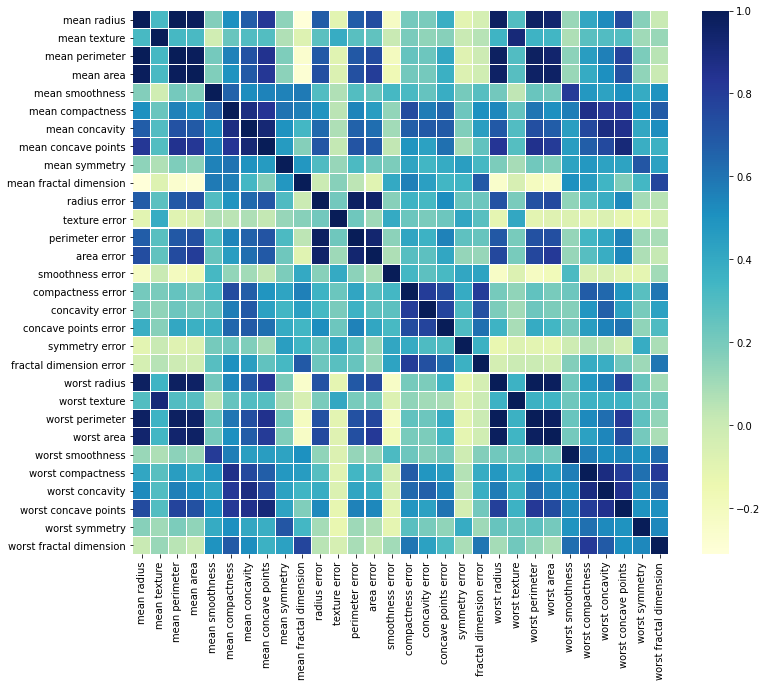

In [ ]:
# Test on loaded dataset

input_data(df)

Does output consist of class labels? (y/n): y
MAE =  0.3339191564147627
MSE =  0.3339191564147627
F1 =  0.7270114942528737
Accuracy score =  0.6660808435852372
Logloss is  11.533279930425355
R2 score is  -0.42843930024840127
Confusion matrix:  [[126  86]
 [104 253]]
Does output consist of class labels? (y/n): k
Please use correct format for the input: y/n
Does output consist of class labels? (y/n): n
569


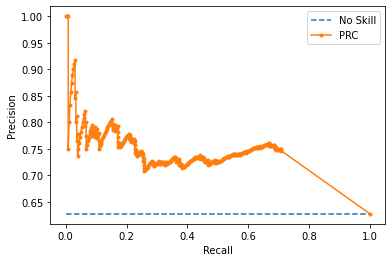

In [ ]:
# Experiment with random values

y_pred = []
for i in range(len(y)):
  y_pred.append(random.randint(0,1))

y_pred[300:500] = y[300:500]

prob = [x*random.uniform(0.3,1) for x in y_pred]

output_data(y, y_pred)

output_data(y, prob)


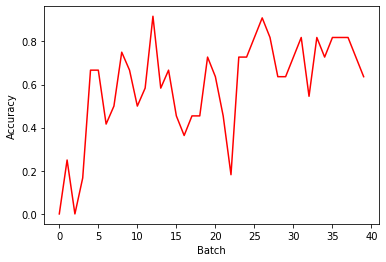

In [ ]:
# Model-agnostic method of tracing of training process

n_splits = 40 # Break down data into n_splits chunks

X_train, X_test, y_train, y_test = md.train_test_split(X, y, random_state=0, test_size=0.2, shuffle=False)
X_train, y_train = array_split(X_train, n_splits), array_split(y_train, n_splits)

model = Sequential() # define the model
model.add(Dense(1, activation='softmax',
                kernel_regularizer=L1L2(l1=0.0, l2=0.1),
                input_dim=len(X_train[0][0])))
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])
#model.compile(optimizer='sgd',
#              metrics=['accuracy'])

train_acc, test_acc = [], []
for i in range(len(X_train)):
  rec_metrics = model.train_on_batch(X_train[i], y_train[i])
  train_acc.append(rec_metrics[1])
  #y_pred = model.predict(X_test)
  #print(len(y_pred))

plt.plot(range(len(X_train)), train_acc, '-r', label='Training batch accuracy')
#plt.plot(range(len(X_train)), test_acc, '-b', label='Test accuracy')
plt.xlabel('Batch')
plt.ylabel('Accuracy')
plt.show()